# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [35]:
#Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

In [2]:
#Reading the CSV
df = pd.read_csv('mobile_price_data.csv')
#Viewing the first few columns of CSV
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [3]:
#Checking for null values
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64


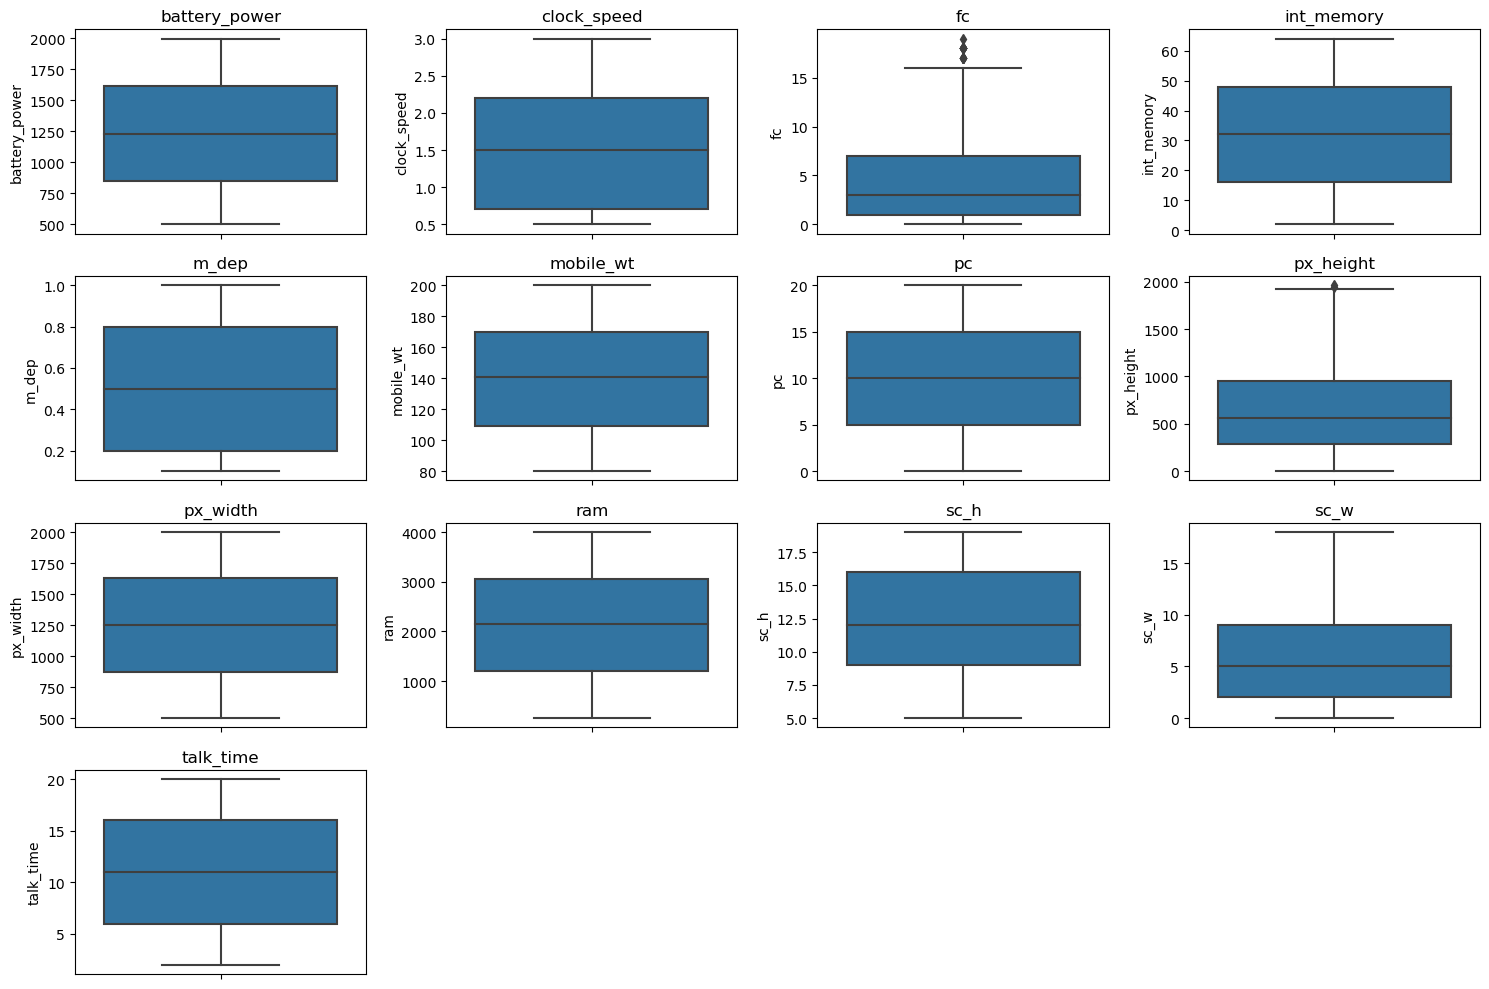

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0         7.0   
1              1021     1          0.5         1   0       1        53.0   
3               615     1          2.5         0   0       0        10.0   
4              1821     1          1.2         0  13       1        44.0   
5              1859     0          0.5         1   3       0        22.0   
...             ...   ...          ...       ...  ..     ...         ...   
1993           1467     1          0.5         0   0       0        18.0   
1994            858     0          2.2         0   1       0        50.0   
1995            794     1          0.5         1   0       1         2.0   
1997           1911     0          0.9         1   1       1        36.0   
1998           1512     0          0.9         0   4       1        46.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0     

In [18]:
# Select numerical features
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Plot box plots for each numerical feature
plt.figure(figsize=(15, 10)) #figure size
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1) #matrix for displaying the plot
    sns.boxplot(y=df[feature])
    plt.title(feature) #title for the box plot
plt.tight_layout() #layout
plt.show() #display the plot

cleaned_df = df.copy()  # make a copy of the original data

#a loop to check outliers in each feature
for feature in numerical_features:
    
    #defining upper and lower quartile for each feature
    lower_quartile = df[feature].quantile(0.05) #lower quartile
    upper_quartile = df[feature].quantile(0.95) #upper quartile
    
    # Remove outliers
    cleaned_df = cleaned_df[(cleaned_df[feature] >= lower_quartile) & (cleaned_df[feature] <= upper_quartile)]

    #printing the data after removing outliers
    print(cleaned_df)


In [21]:
#selecting features by correlation
correlation_features = cleaned_df.corr()
#sorting the correlation of features in ascending order to pick the best ones for training the model
correlation_selection = correlation_features['price_range'].abs().sort_values(ascending=False)
selected_features = correlation_selection[correlation_selection > threshold].index.tolist()
#printing the features slecting for training the model
print(selected_features)


[]


In [37]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
# Impute missing values with mean using DataFrame's fillna() method
X_imputed = X.fillna(X.mean())

# defining X and y
X = df.drop(columns=['price_range'])
y = df['price_range']

# Apply SelectKBest class to extract top 5 best features
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X_imputed, y)

# Get feature scores
feature_scores = pd.DataFrame(fit.scores_) 
feature_columns = pd.DataFrame(X.columns)

# Concatenate dataframes
feature_scores_df = pd.concat([feature_columns, feature_scores], axis=1)
feature_scores_df.columns = ['Feature', 'Score']

# Get top 5 features
selected_features = feature_scores_df.nlargest(5, 'Score')['Feature'].tolist()

#Printing selected features
print(selected_features)

['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt']


In [40]:
X = cleaned_df[selected_features] # x variable - each time one feature
y = cleaned_df['price_range'] #y variable -price_range

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
#importing LogisticRegression and Standard Scalar
scaler = StandardScaler()
log_reg = LogisticRegression(max_iter = 1000, solver='lbfgs')

#Scaling the X variable
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#getting line of best fit
log_reg.fit(X_train_scaled,y_train)
print(log_reg.fit(X_train_scaled,y_train))

#Evaluating the model
train_accuracy_test= log_reg.score(X_train_scaled,y_train)
print('train_accuracy_test:',train_accuracy_test) 
test_accuracy_test=log_reg.score(X_test_scaled,y_test)
print('test_accuracy_test:', test_accuracy_test)

LogisticRegression(max_iter=1000)
train_accuracy_test: 0.9639769452449568
test_accuracy_test: 0.9482758620689655


Evaluation of Model performance-

Performance:

The model seems to be performing well as both R2 results for training and testing are close to one which explains large variance in price range throughout the csv.

Factors:

The factors that have contributed to these results are the features we selected for calculating these numbers. If other features were selected the results would've differed and so would've the training. The ratio we used to split the data, if the ratio changes the results of the model change. Lastly, if there were more outliers present in the dataset the answers would've varied.

Improvements:

I could've increased the number of features selected to ensure that the results were more extensive.

In [52]:
#KNN Model
#Training the model
knn = KNeighborsClassifier(n_neighbors=5) #5 here is the number of features that we evaluating
knn.fit(X_train, y_train) 
print(knn.fit(X_train, y_train))

#Evaluating the model
train_accuracy_knn = accuracy_score(y_train, knn.predict(X_train))
print('train_accuracy_knn : ', train_accuracy_knn)
test_accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
print("test_accuracy_knn :",test_accuracy_knn)

KNeighborsClassifier()
train_accuracy_knn :  0.9365994236311239
test_accuracy_knn : 0.9195402298850575


In [54]:
#Tuning K parameter results 
param_grid = {'n_neighbors': range(1, 21)}
#Searches for the most optimal hyperparameter among the 5 selected featues
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("grid_search:", grid_search)
print(grid_search.fit(X_train, y_train))

grid_search: GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')
GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')


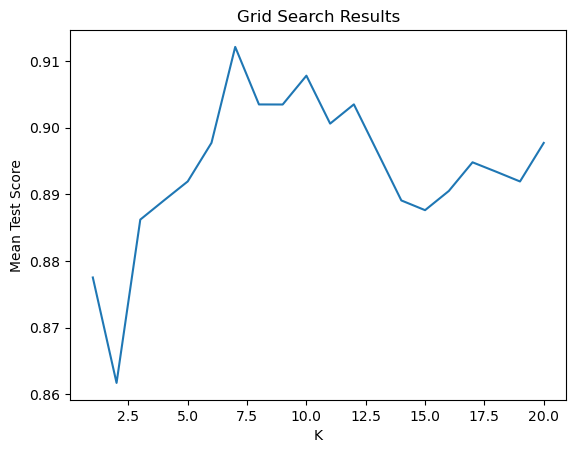

In [57]:
#Visualising the results
plt.plot(range(1, 21),grid_search.cv_results_['mean_test_score'])
plt.xlabel('K') #X-label
plt.ylabel('Mean Test Score') #Y-label
plt.title('Grid Search Results') #Chart title
plt.show() #Command to display the chart

# Best K
best_k = grid_search.best_params_['n_neighbors'] #represents the line
#that represents the optimal hyperparameter


How k-hyperparameter influences in the performance of a model:

The more number of neighbours choosen while modelling the KNN model the more generalised results we get. If we reduce the number of n-neighbours to 3 the results will be more details with respect to thse factors. A low value of K variable represents high variance in the dataset however it gives more precise results. However in cases of high K values, the result have low variance. 